In [10]:
import numpy as np
REAL = np.float32 
# initialize method for Model to work
def sif_embeddings_fasttext(sentences, model, alpha=0.025):
    vlookup = model.words 
    size = model.get_dimension()  
    output = []
    for s in sentences:
        count = 0
        v = np.zeros(size, dtype=REAL) # Summary vector
        for w in str(s).split(' '):
            if w in vlookup:
                    w1=model.get_word_vector(w)
                    for i in range(size):
                        v[i] +=  (w1[i])
                    count += 1
        if count > 0:
            for i in range(size):
                v[i] *= 1/count
        output.append(abs(v))
    return np.vstack((output)).astype(REAL)

In [9]:
# print(predicted)
import numpy as np
REAL = np.float32 
# initialize method for Model to work
def sif_embeddings(sentences, model, alpha=0.025):
    vlookup = model.wv.vocab  # Gives us access to word index and count
    vectors = model.wv        # Gives us access to word vectors
    size = model.vector_size  # Embedding size
    output = []
    for s in sentences:
        count = 0
        v = np.zeros(size, dtype=REAL) # Summary vector
        for w in str(s).split(' '):
            if w in vlookup:
                    for i in range(size):
                        v[i] +=  vectors[w][i]
                    count += 1 
        if count > 0:
            for i in range(size):
                v[i] *= 1/count
        output.append((v))
    return np.vstack((output)).astype(REAL)

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import datasets, linear_model, metrics 
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from gensim.models import Word2Vec
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [2]:
import  pandas as pd
df_misra = pd.read_csv('poet_.csv',encoding='utf-8')
df_misra.head()

,غزل,label
0,نقش فریادی ہے کس کی شوخیِ تحریر کا,ghalib
1,کاغذی ہے پیرہن ہر پیکرِ تصویر کا,ghalib
2,شوخیِ نیرنگ، صیدِ وحشتِ طاؤس ہے,ghalib
3,دام، سبزے میں ہے پروازِ چمن تسخیر کا,ghalib
4,لذّتِ ایجادِ ناز، افسونِ عرضِ ذوقِ قتل,ghalib


In [3]:
i=0
X = []
Y = []
while i < len(df_misra):
    X.append( (str(df_misra['غزل'][i])).strip('\ufeff|\r\n|1|2|3|4|5|6|7|8|9|0'))
    if(df_misra['label'][i]=='faiz'):
        Y.append('0')
    if(df_misra['label'][i]=='ghalib'):
        Y.append('1')
    if(df_misra['label'][i]=='iqbal'):
        Y.append('2')
    i+=1
print(len(X))

11018


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,test_size=0.20,
                                                    random_state=1)

In [5]:
text_clf_NB = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
text_clf_NB.fit(X_train, y_train)
predicted = text_clf_NB.predict(X_test)

results = confusion_matrix(y_test, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predicted) )
print ('Report : ')
print( classification_report(y_test, predicted) )
# print( "Accuracy NB: ",np.mean(predicted == y_test))

Confusion Matrix :
[[399 250  28]
 [ 52 729  33]
 [ 33  71 609]]
Accuracy Score : 0.7881125226860254
Report : 
              precision    recall  f1-score   support

           0       0.82      0.59      0.69       677
           1       0.69      0.90      0.78       814
           2       0.91      0.85      0.88       713

    accuracy                           0.79      2204
   macro avg       0.81      0.78      0.78      2204
weighted avg       0.80      0.79      0.78      2204



In [6]:
text_clf_RBFKernelSVC = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SVC())])
text_clf_RBFKernelSVC.fit(X_train, y_train)
predicted = text_clf_RBFKernelSVC.predict(X_test)
results = confusion_matrix(y_test, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predicted) )
print ('Report : ')
print( classification_report(y_test, predicted) )

# print ("Accuracy RBFKernelSVC: ",np.mean(predicted == y_test))

Confusion Matrix :
[[519 117  41]
 [ 67 699  48]
 [ 47  58 608]]
Accuracy Score : 0.8284936479128857
Report : 
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       677
           1       0.80      0.86      0.83       814
           2       0.87      0.85      0.86       713

    accuracy                           0.83      2204
   macro avg       0.83      0.83      0.83      2204
weighted avg       0.83      0.83      0.83      2204



In [21]:
text_clf_LinearKernelSVC = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', SVC(kernel='linear'))])
text_clf_LinearKernelSVC.fit(X_train, y_train)
predicted = text_clf_LinearKernelSVC.predict(X_test)
results = confusion_matrix(y_test, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predicted) )
print ('Report : ')
print( classification_report(y_test, predicted) )

# print ("Accuracy LinearKernelSVC: ",np.mean(predicted == y_test))

Confusion Matrix :
[[544 101  32]
 [117 659  38]
 [ 80  45 588]]
Accuracy Score : 0.8126134301270418
Report : 
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       677
           1       0.82      0.81      0.81       814
           2       0.89      0.82      0.86       713

    accuracy                           0.81      2204
   macro avg       0.82      0.81      0.81      2204
weighted avg       0.82      0.81      0.81      2204



In [22]:
reg = linear_model.LinearRegression() 
text_clf_lr = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', linear_model.LinearRegression())])
text_clf_lr.fit(X_train, y_train) 
predicted = text_clf_LinearKernelSVC.predict(X_test)
results = confusion_matrix(y_test, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predicted) )
print ('Report : ')
print( classification_report(y_test, predicted) )
# print ("Accuracy Linear Regression: ",np.mean(predicted == y_test))

Confusion Matrix :
[[544 101  32]
 [117 659  38]
 [ 80  45 588]]
Accuracy Score : 0.8126134301270418
Report : 
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       677
           1       0.82      0.81      0.81       814
           2       0.89      0.82      0.86       713

    accuracy                           0.81      2204
   macro avg       0.82      0.81      0.81      2204
weighted avg       0.82      0.81      0.81      2204



In [7]:
text_clf_AdamMLP = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf',  MLPClassifier(hidden_layer_sizes=(128)))])
text_clf_AdamMLP.fit(X_train, y_train)
predicted = text_clf_AdamMLP.predict(X_test)
results = confusion_matrix(y_test, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predicted) )
print ('Report : ')
print( classification_report(y_test, predicted) )
# print ("Accuracy Neural Network: ",np.mean(predicted == y_test))

Confusion Matrix :
[[552 101  24]
 [136 625  53]
 [ 58  64 591]]
Accuracy Score : 0.8021778584392014
Report : 
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       677
           1       0.79      0.77      0.78       814
           2       0.88      0.83      0.86       713

    accuracy                           0.80      2204
   macro avg       0.81      0.80      0.80      2204
weighted avg       0.81      0.80      0.80      2204



In [12]:
# model = Word2Vec.load("extended.model")
text_clf_NB = Pipeline([ ('clf',MLPClassifier())]).fit(sif_embeddings(X_train,model,0.025), y_train)
predicted = text_clf_NB.predict(sif_embeddings(X_test,model,0.025))
results = confusion_matrix(y_test, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predicted) )
print ('Report : ')
print( classification_report(y_test, predicted) )
# print (np.mean(predicted == y_test))

Confusion Matrix :
[[513 117  47]
 [104 646  64]
 [ 56  78 579]]
Accuracy Score : 0.7885662431941923
Report : 
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       677
           1       0.77      0.79      0.78       814
           2       0.84      0.81      0.83       713

    accuracy                           0.79      2204
   macro avg       0.79      0.79      0.79      2204
weighted avg       0.79      0.79      0.79      2204



In [28]:
# model = Word2Vec.load("extended.model")
text_clf_NB = Pipeline([ ('clf',GaussianNB())]).fit(sif_embeddings(X_train,model,0.025), y_train)
predicted = text_clf_NB.predict(sif_embeddings(X_test,model,0.025))
results = confusion_matrix(y_test, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predicted) )
print ('Report : ')
print( classification_report(y_test, predicted) )
# print (np.mean(predicted == y_test))

Confusion Matrix :
[[429 126 122]
 [214 336 264]
 [119  93 501]]
Accuracy Score : 0.574410163339383
Report : 
              precision    recall  f1-score   support

           0       0.56      0.63      0.60       677
           1       0.61      0.41      0.49       814
           2       0.56      0.70      0.63       713

    accuracy                           0.57      2204
   macro avg       0.58      0.58      0.57      2204
weighted avg       0.58      0.57      0.57      2204



In [29]:
model1 = fasttext.load_model('cc.ur.300.bin')
text_clf_NB = Pipeline([ ('clf',MLPClassifier(hidden_layer_sizes=(128), solver='sgd', momentum=0.9))]).fit(sif_embeddings_fasttext(X_train,model1,0.025), y_train)
predicted = text_clf_NB.predict(sif_embeddings_fasttext(X_test,model1,0.025))
results = confusion_matrix(y_test, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, predicted) )
print ('Report : ')
print( classification_report(y_test, predicted) )

# print ("Accuracy Fasttext Pre-Trained Model: ",np.mean(predicted == y_test))


E:\Anaconda2\envs\a\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion Matrix :
[[301 287  89]
 [113 561 140]
 [ 45 151 517]]
Accuracy Score : 0.6256805807622504
Report : 
              precision    recall  f1-score   support

           0       0.66      0.44      0.53       677
           1       0.56      0.69      0.62       814
           2       0.69      0.73      0.71       713

    accuracy                           0.63      2204
   macro avg       0.64      0.62      0.62      2204
weighted avg       0.63      0.63      0.62      2204



In [30]:
# # clf = AdaBoostClassifier()
# text_clf_NB = Pipeline([ AdaBoostClassifier(n_estimators=100) ]).fit(sif_embeddings_fasttext(X_train,model,0.025), y_train)
# print ("Accuracy AdaBoostClassifier: ",np.mean(predicted == y_test))

In [32]:
# model1 = fasttext.load_model('cc.ur.300.bin')
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, sif_embeddings_fasttext(X,model1,0.025), Y, cv=5)
scores.mean()

0.5906711932993534

In [ ]:
# clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
#     min_samples_split=2, random_state=0)
# scores = cross_val_score(clf, X,Y, cv=5)
# scores.mean()

In [9]:
# model1 = fasttext.load_model('cc.ur.300.bin')
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])
scores1 = cross_val_score(eclf, sif_embeddings_fasttext(X,model1,0.025), Y, cv=5)
scores1.mean()

0.7238140450285167

In [5]:
docs = X

labels = to_categorical(Y)

vocab_size = 305812

encoded_docs = [one_hot(d, vocab_size) for d in docs]

X=np.array(X)
Y=np.array(Y)
padded_docs = pad_sequences(encoded_docs, maxlen=X.shape[0], padding='post')
padded_docs=np.array(padded_docs)
labels=np.array(labels)
x_train, x_test, y_train, y_test = train_test_split(padded_docs, 
                                                    labels,test_size=0.20,
                                                    random_state=1)
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=X.shape[0]))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
# model.add(LSTM(lstm_output_size))
model.add(Bidirectional(LSTM(64)))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])

print('Train...')

# print(y_binary[0])
# print(ytext_binary[10])
history = model.fit(x_train, y_train ,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score, acc,f1_m,precision_m, recall_m = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print('Test f1_m:', f1_m)
print('Test precision_m:', precision_m)
print('Test recall_m:', recall_m)

Train...


E:\Anaconda2\envs\a\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8814 samples, validate on 2204 samples
Epoch 1/2
8814/8814 [==============================] - 4089s 464ms/step - loss: 0.7190 - accuracy: 0.6641 - f1_m: 0.2914 - precision_m: 0.8572 - recall_m: 0.2215 - val_loss: 0.4485 - val_accuracy: 0.8226 - val_f1_m: 0.3799 - val_precision_m: 0.9972 - val_recall_m: 0.2394
Epoch 2/2
2204/2204 [==============================] - 100s 46ms/step
Test score: 0.42307180299435465
Test accuracy: 0.8411978483200073
Test f1_m: 0.45650869607925415
Test precision_m: 0.9929532408714294
Test recall_m: 0.30199480056762695


In [4]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


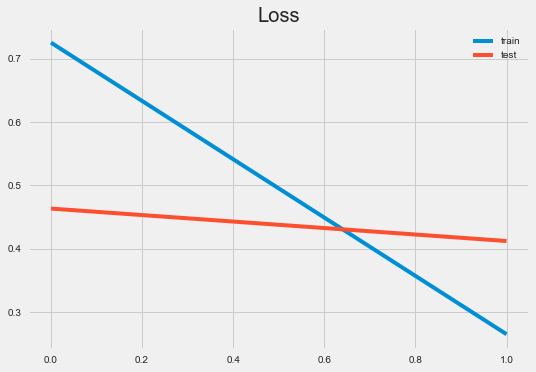

In [31]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.style.use('fivethirtyeight')
plt.legend()
plt.show();

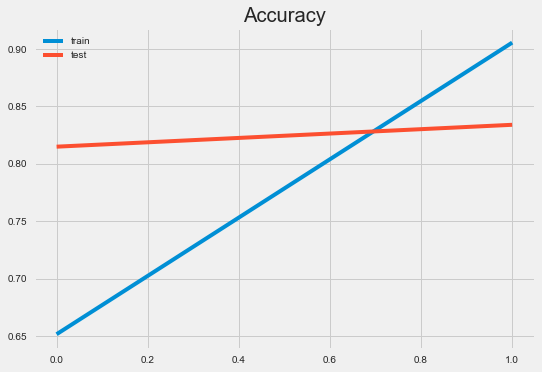

In [30]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.style.use('fivethirtyeight')
plt.legend()
plt.show();

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import  pandas as pd
from sklearn.svm import SVC

### this is code to generate corpus
import csv

X_train=[]
X_test = []
y_train = []
y_test = []
df_misra = pd.read_csv('poet_.csv',encoding='utf-8')

kf = StratifiedKFold(n_splits=5)
values = []
accuracy = []
for train_index, test_index in kf.split(df_misra['غزل'],df_misra['label']):

    i=0
    y_train = []
    X_train = []
    while i<len(train_index):
        X_train.append(str(df_misra['غزل'][train_index[i]]).strip('\ufeff|\r\n|1|2|3|4|5|6|7|8|9|0'))
        if(df_misra['label'][train_index[i]]=='faiz'):
            y_train.append('0')
        if(df_misra['label'][train_index[i]]=='ghalib'):
            y_train.append('1')
        if(df_misra['label'][train_index[i]]=='iqbal'):
            y_train.append('2')
        i=i+1
    i=0
    X_test = []
    y_test = []
    while i<len(test_index):
        X_test.append(str(df_misra['غزل'][test_index[i]]).strip('\ufeff|\r\n|1|2|3|4|5|6|7|8|9|0'))
        if(df_misra['label'][test_index[i]]=='faiz'):
            y_test.append('0')
        if(df_misra['label'][test_index[i]]=='ghalib'):
            y_test.append('1')
        if(df_misra['label'][test_index[i]]=='iqbal'):
            y_test.append('2')
        i=i+1


    #Import MultinomialNB Naive Bayes model
    
    text_clf_NB = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SVC()),])
    text_clf_NB.fit(X_train, y_train)
    predicted = text_clf_NB.predict(X_test)
    
    values.append(np.mean(predicted == y_test))
    
print ("Avg. Accuracy MultinomialNB K=5: ", np.mean(values))
